# Human Activity Recognition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [ ]:
# Read the CSV file using pandas with the specified delimiter
df = pd.read_csv("dataset-har-PUC-Rio-ugulino.csv")

# Now you can work with the DataFrame (df) containing your data
print(df)

               user gender  age  how_tall_in_meters  weight  body_mass_index  \
0            debora  Woman   46                 162      75              286   
1            debora  Woman   46                 162      75              286   
2            debora  Woman   46                 162      75              286   
3            debora  Woman   46                 162      75              286   
4            debora  Woman   46                 162      75              286   
...             ...    ...  ...                 ...     ...              ...   
165628  jose_carlos    Man   75                 167      67              240   
165629  jose_carlos    Man   75                 167      67              240   
165630  jose_carlos    Man   75                 167      67              240   
165631  jose_carlos    Man   75                 167      67              240   
165632  jose_carlos    Man   75                 167      67              240   

        x1  y1   z1  x2  y2   z2  x3   

In [ ]:
df.shape

(165633, 19)

In [ ]:
df.columns

Index(['user', 'gender', 'age', 'how_tall_in_meters', 'weight',
       'body_mass_index', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3',
       'x4', 'y4', 'z4', 'class'],
      dtype='object')

### Demographic features

In [ ]:
# Create a DataFrame with user information
user_info = df.groupby('user').agg(
    Gender=('gender', 'max'),
    Age=('age', 'max'),
    Height=('how_tall_in_meters', 'max'),
    Weight=('weight', 'max'),
    BMI=('body_mass_index', 'max'),
    N=('user', 'count')
).reset_index()

# Display the user information with name counts
user_info

user Gender  Age  Height  Weight  BMI      N
0       debora  Woman   46     162      75  286  51577
1  jose_carlos    Man   75     167      67  240  13161
2        katia  Woman   28     158      55  220  49797
3      wallace    Man   31     171      83  284  51098

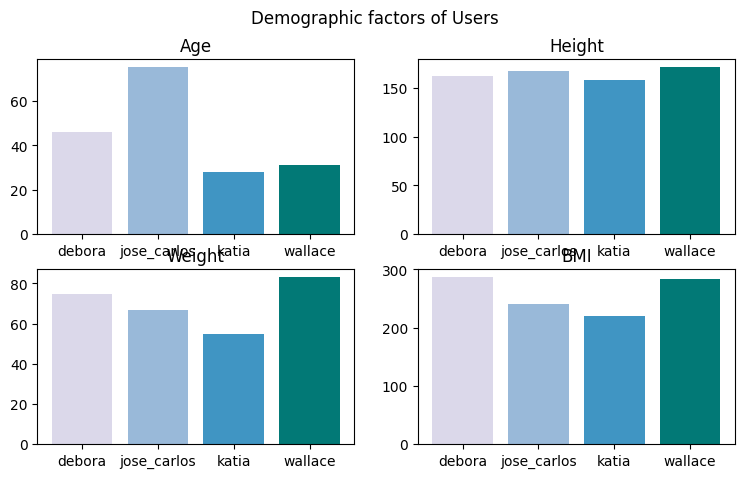

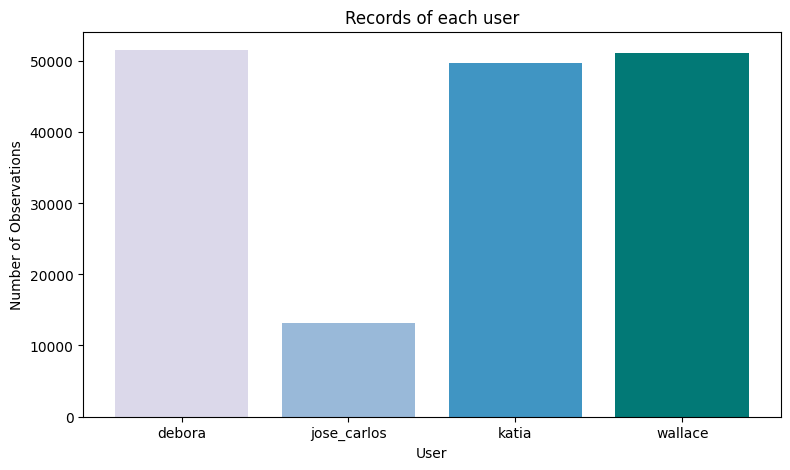

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your original dataset
# Creating a DataFrame with user information
user_info = df.groupby('user').agg(
    Gender=('gender', 'max'),
    Age=('age', 'max'),
    Height=('how_tall_in_meters', 'max'),
    Weight=('weight', 'max'),
    BMI=('body_mass_index', 'max'),
    N=('user', 'count')
).reset_index()

# Set the BrBG color palette
colors = sns.color_palette("PuBuGn", n_colors=len(user_info['user']))

# Data visualization for age, height, weight, and BMI
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
fig.suptitle('Demographic factors of Users')

# Bar plots for Age, Height, Weight, and BMI
columns_to_plot = ['Age', 'Height', 'Weight', 'BMI']
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.bar(user_info['user'], user_info[column], color=colors)
    ax.set_title(column)

# Bar plot for the distribution of the number of observations
fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(user_info['user'], user_info['N'], color=colors)
ax.set_title('Records of each user')
ax.set_xlabel('User')
ax.set_ylabel('Number of Observations')

plt.show()

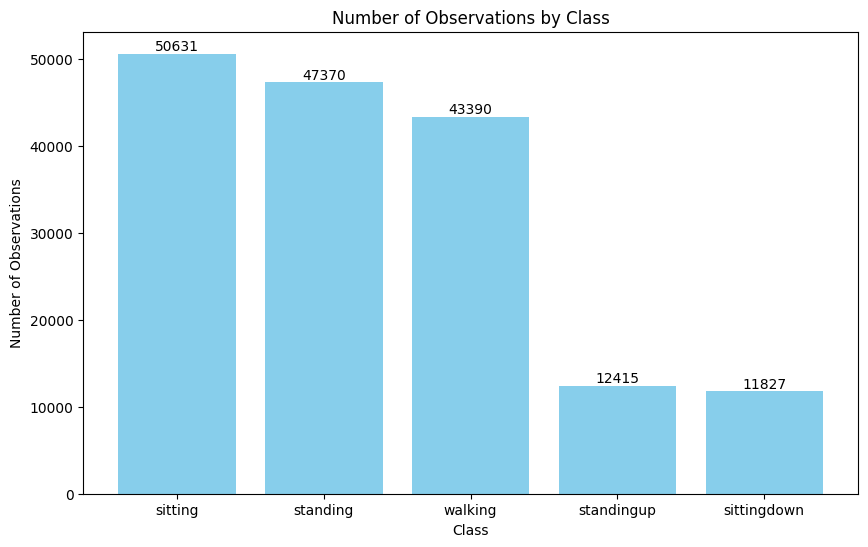

In [ ]:
# Count the number of observations for each class
class_counts = df['class'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(class_counts.index, class_counts, color='skyblue')

# Adding labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Number of Observations')
plt.title('Number of Observations by Class')
plt.xticks(rotation=0)
plt.show()

## Basic Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165633 entries, 0 to 165632
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user                165633 non-null  object
 1   gender              165633 non-null  object
 2   age                 165633 non-null  int64 
 3   how_tall_in_meters  165633 non-null  int64 
 4   weight              165633 non-null  int64 
 5   body_mass_index     165633 non-null  int64 
 6   x1                  165633 non-null  int64 
 7   y1                  165633 non-null  int64 
 8   z1                  165633 non-null  int64 
 9   x2                  165633 non-null  int64 
 10  y2                  165633 non-null  int64 
 11  z2                  165633 non-null  int64 
 12  x3                  165633 non-null  int64 
 13  y3                  165633 non-null  int64 
 14  z3                  165633 non-null  int64 
 15  x4                  165633 non-null  int64 
 16  y4

In [ ]:
df.describe()

age  how_tall_in_meters         weight  body_mass_index  \
count  165633.000000       165633.000000  165633.000000    165633.000000   
mean       38.265146          163.971220      70.819408       261.885216   
std        13.184091            5.282034      11.296527        29.957772   
min        28.000000          158.000000      55.000000       220.000000   
25%        28.000000          158.000000      55.000000       220.000000   
50%        31.000000          162.000000      75.000000       284.000000   
75%        46.000000          171.000000      83.000000       286.000000   
max        75.000000          171.000000      83.000000       286.000000   

                  x1             y1             z1             x2  \
count  165633.000000  165633.000000  165633.000000  165633.000000   
mean       -6.649327      88.293667     -93.164611     -87.827504   
std        11.616238      23.895829      39.409423     169.435194   
min      -306.000000    -271.000000    -603.000000    -494.000000   
25%       -12.000000      78.000000    -120.000000     -35.000000   
50%        -6.000000      94.000000     -98.000000      -9.000000   
75%         0.000000     101.000000     -64.000000       4.000000   
max       509.000000     533.000000     411.000000     473.000000   

                  y2             z2             x3             y3  \
count  165633.000000  165633.000000  165633.000000  165633.000000   
mean      -52.065047    -175.055200      17.423515     104.517167   
std       205.159763     192.816615      52.635388      54.155843   
min      -517.000000    -617.000000    -499.000000    -506.000000   
25%       -29.000000    -141.000000       9.000000      95.000000   
50%        27.000000    -118.000000      22.000000     107.000000   
75%        86.000000     -29.000000      34.000000     120.000000   
max       295.000000     122.000000     507.000000     517.000000   

                  z3             x4             y4             z4  
count  165633.000000  165633.000000  165633.000000  165633.000000  
mean      -93.881726    -167.641448     -92.625171    -159.650891  
std        45.389646      38.311342      19.968610      13.221036  
min      -613.000000    -702.000000    -526.000000    -537.000000  
25%      -103.000000    -190.000000    -103.000000    -167.000000  
50%       -90.000000    -168.000000     -91.000000    -160.000000  
75%       -80.000000    -153.000000     -80.000000    -153.000000  
max       410.000000     -13.000000      86.000000     -43.000000

# Data Preprocessing

## Missing values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

# To count the total number of missing values in the entire DataFrame:
total_missing = df.isnull().sum().sum()
print("Total Missing Values:", total_missing)

Columns with Missing Values:
Series([], dtype: int64)
Total Missing Values: 0


## Outliers



1.   IQR Method
3.   Box plots
4.   Scatter plot







#### Method 1: IQR or Tukey Rule  

In [ ]:
import pandas as pd

# Calculate the IQR (Interquartile Range) for all numerical columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers in the entire dataset
outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Display the rows containing outliers
print("Outliers:")
print(outliers)

<ipython-input-11-c7212d28d785>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-11-c7212d28d785>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-11-c7212d28d785>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]


Outliers:
               user gender  age  how_tall_in_meters  weight  body_mass_index  \
1272         debora  Woman   46                 162      75              286   
1276         debora  Woman   46                 162      75              286   
7938         debora  Woman   46                 162      75              286   
7939         debora  Woman   46                 162      75              286   
7940         debora  Woman   46                 162      75              286   
...             ...    ...  ...                 ...     ...              ...   
165628  jose_carlos    Man   75                 167      67              240   
165629  jose_carlos    Man   75                 167      67              240   
165630  jose_carlos    Man   75                 167      67              240   
165631  jose_carlos    Man   75                 167      67              240   
165632  jose_carlos    Man   75                 167      67              240   

        x1   y1   z1  x2  y2 

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with your dataset

# Function to count the number of outliers in a column using IQR
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Get unique values in the 'class' column
unique_classes = df['class'].unique()

# Columns to check for outliers (excluding 'age' and 'weight', and including 'z4')
columns_to_check = [col for col in df.columns if col not in ['age', 'weight']]

# Create a tabular dictionary to store the count of outliers for each class and column
tabular_dict = {}

# Loop through each unique class and count outliers for each column
for class_label in unique_classes:
    class_df = df[df['class'] == class_label]
    class_outliers = {}
    for column in columns_to_check:
        if pd.api.types.is_numeric_dtype(class_df[column]):
            class_outliers[column] = count_outliers(class_df[column])
    tabular_dict[class_label] = class_outliers

# Create a DataFrame from the tabular dictionary
outlier_df = pd.DataFrame(tabular_dict).T

# Print the tabular DataFrame
outlier_df.head()

how_tall_in_meters  body_mass_index    x1   y1   z1     x2    y2  \
sitting                       0                0   315    0  226  10339  9385   
sittingdown                   0                0   800  118  330      0     0   
standing                      0                0   303  119  467   4489  4032   
standingup                    0                0   653  884   39   1272     0   
walking                       0                0  1142  798  372      0     0   

               z2    x3    y3    z3   x4   y4    z4  
sitting      9399   169   140  6367   20  143  1732  
sittingdown     0    13   560     4   79  989   281  
standing     8873   839   812  1724  145  202  1657  
standingup      0  1158   890  1187  219  648   536  
walking         0  6161  4058  3427   36  281   968

#### Method 2: Box Plots



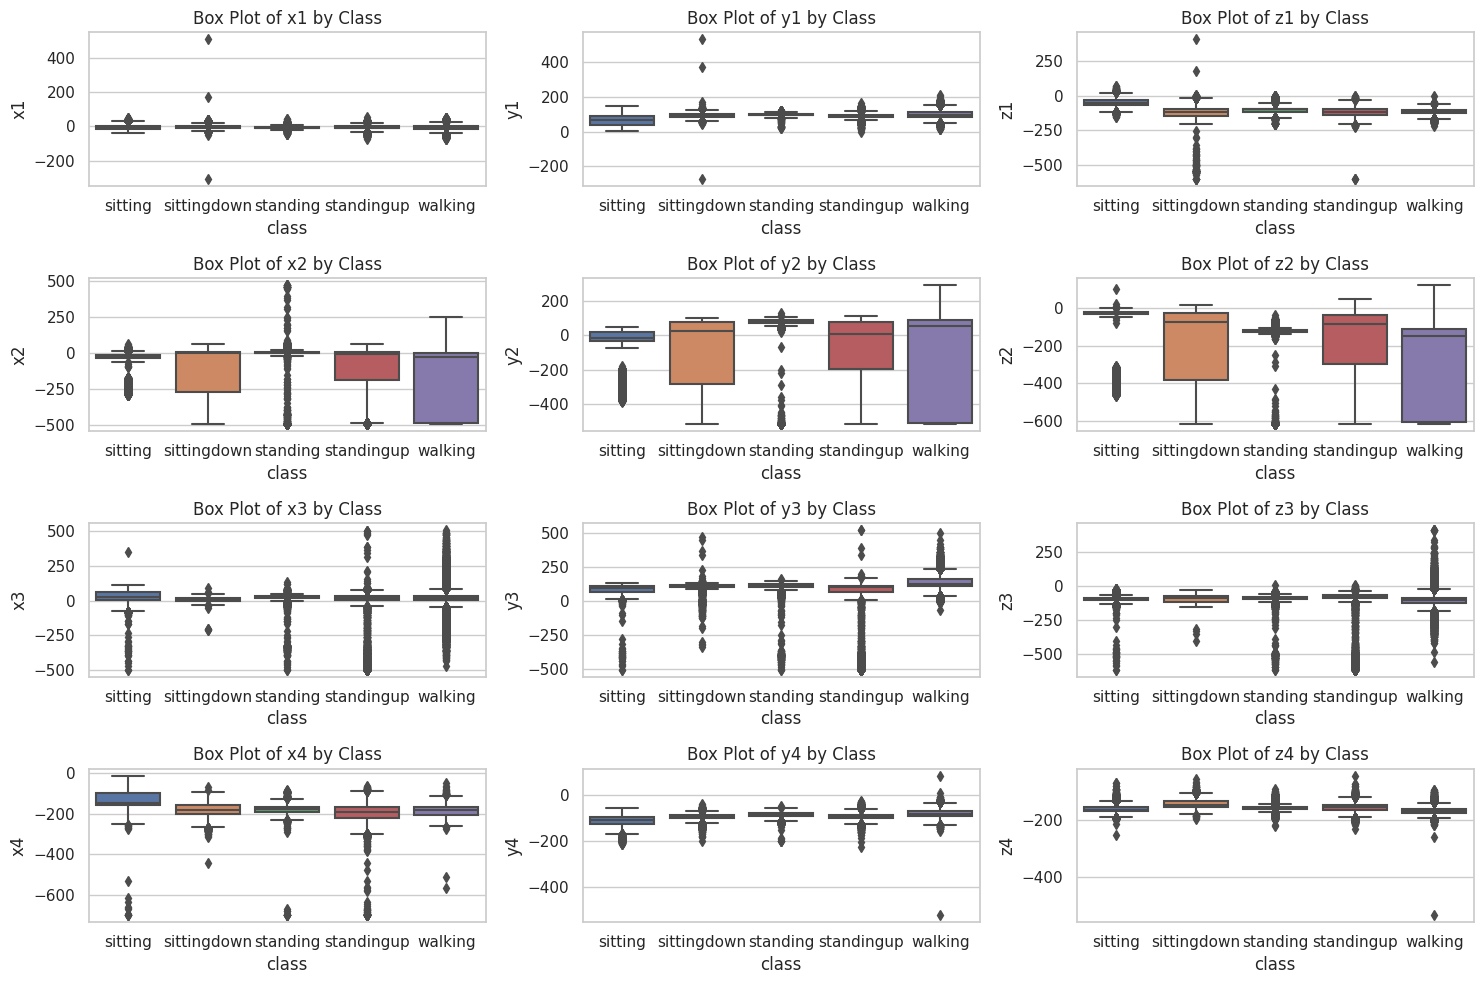

In [ ]:
# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Specify the columns for which you want to create box plots
columns_for_boxplot = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']

# Create box plots for x, y, and z coordinates based on the 'class' column
plt.figure(figsize=(15, 10))
for column in columns_for_boxplot:
    plt.subplot(4, 3, columns_for_boxplot.index(column) + 1)
    sns.boxplot(x='class', y=column, data=df)
    plt.title(f'Box Plot of {column} by Class')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


#### Method 3: Scatter Plots

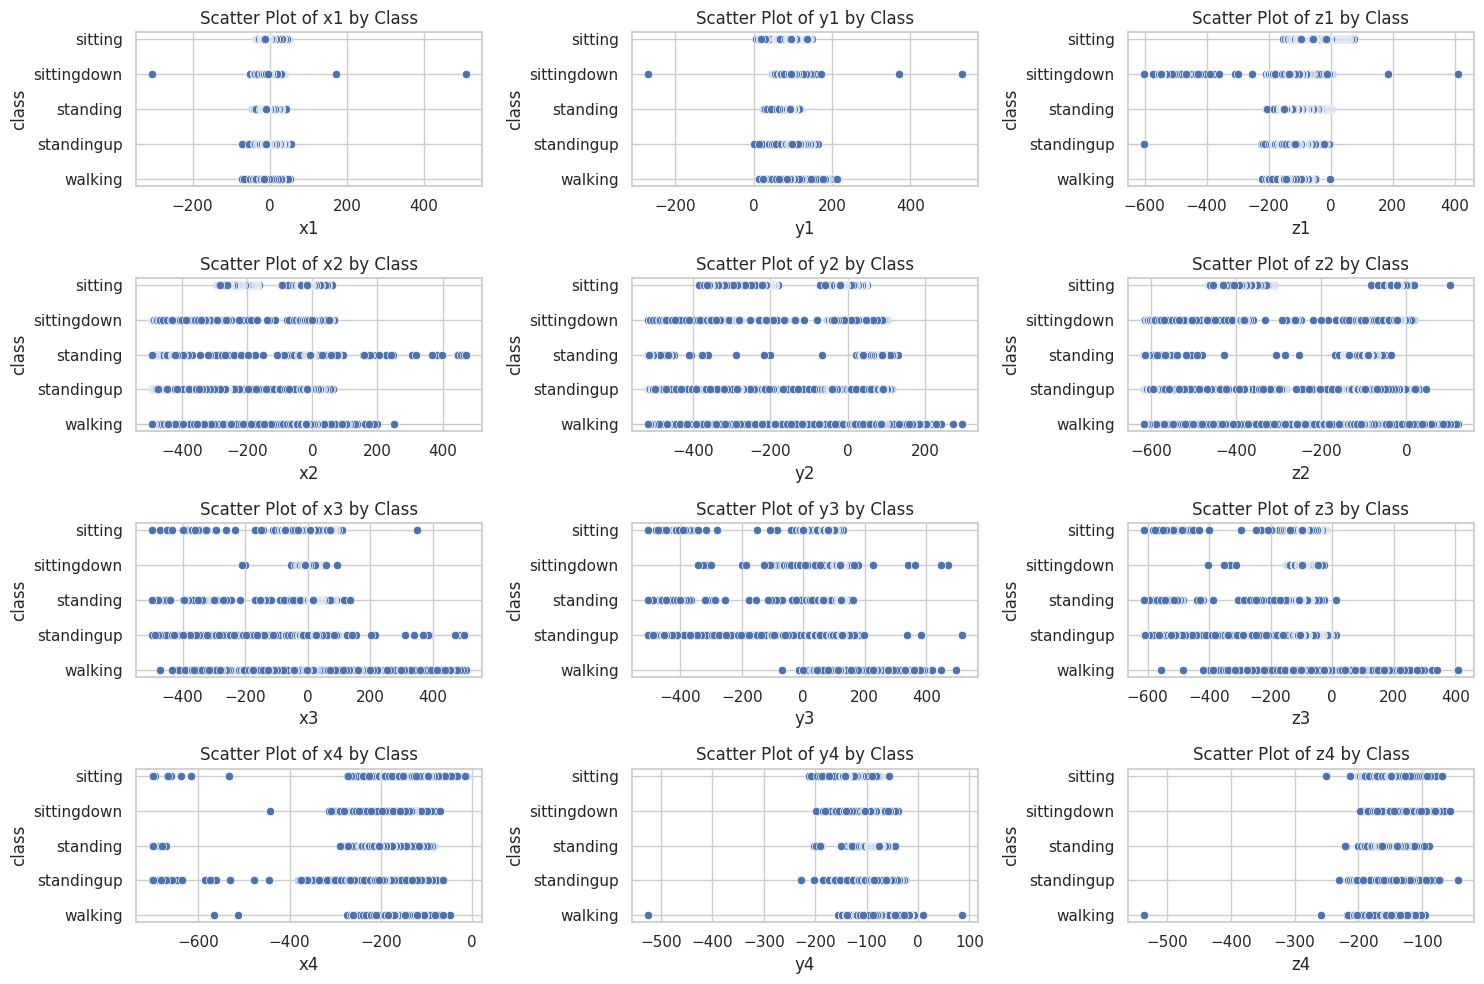

In [ ]:
# Specify the columns for which you want to create scatter plots
columns_for_scatterplot = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']

# Create scatter plots for x, y, and z coordinates
plt.figure(figsize=(15, 10))
for column in columns_for_scatterplot:
    plt.subplot(4, 3, columns_for_scatterplot.index(column) + 1)
    sns.scatterplot(x=column, y='class', data=df)
    plt.title(f'Scatter Plot of {column} by Class')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [ ]:
# Get unique values in the 'class' column
unique_classes = df['class'].unique()

# Columns to check for outliers (excluding 'age', 'weight', 'how_tall_in_meters', 'body_mass_index', and including 'z4')
columns_to_check = [col for col in df.columns if col not in ['age', 'weight', 'how_tall_in_meters', 'body_mass_index']]

# Create a tabular dictionary to store the count of outliers for each class and column
tabular_dict = {}

# Loop through each unique class and count outliers for each column
for class_label in unique_classes:
    class_df = df[df['class'] == class_label]
    class_outliers = {}
    for column in columns_to_check:
        if pd.api.types.is_numeric_dtype(class_df[column]):
            class_outliers[column] = count_outliers(class_df[column])
    tabular_dict[class_label] = class_outliers

# Create a DataFrame from the tabular dictionary
outlier_df = pd.DataFrame(tabular_dict).T

# Print the tabular DataFrame
outlier_df

x1   y1   z1     x2    y2    z2    x3    y3    z3   x4   y4  \
sitting       315    0  226  10339  9385  9399   169   140  6367   20  143   
sittingdown   800  118  330      0     0     0    13   560     4   79  989   
standing      303  119  467   4489  4032  8873   839   812  1724  145  202   
standingup    653  884   39   1272     0     0  1158   890  1187  219  648   
walking      1142  798  372      0     0     0  6161  4058  3427   36  281   

               z4  
sitting      1732  
sittingdown   281  
standing     1657  
standingup    536  
walking       968

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
df_column = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4']

# Calculate the IQR (Interquartile Range) for the specified columns
Q1 = df[df_column].quantile(0.25)
Q3 = df[df_column].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers for each specified column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean array indicating whether each value is an outlier or not
outliers = ((df[df_column] < lower_bound) | (df[df_column] > upper_bound))

# Replace outliers with respective medians for the specified columns
for column in df_column:
    median_value = df[column].median()
    df[column] = df[column].where(~outliers[column], median_value)

# Display the DataFrame after replacing outliers with medians for the specified columns
print("DataFrame without outliers for specified columns:")
print(df[df_column])


DataFrame without outliers for specified columns:
        x1  y1   z1  x2  y2   z2  x3   y3   z3   x4   y4   z4
0       -3  92  -63 -23  18  -19   5  104  -92 -150 -103 -147
1       -3  94  -64 -21  18  -18 -14  104  -90 -149 -104 -145
2       -1  97  -61 -12  20  -15 -13  104  -90 -151 -104 -144
3       -2  96  -57 -15  21  -16 -13  104  -89 -153 -103 -142
4       -1  96  -61 -13  20  -15 -13  104  -89 -153 -104 -143
...     ..  ..  ...  ..  ..  ...  ..  ...  ...  ...  ...  ...
165628   2  93 -148  -8  88 -100  15  120 -100 -189  -77 -160
165629  -1  94 -147 -17  87  -99  17  121  -99 -190  -78 -158
165630 -10  93 -143 -19  86 -104   0  114 -101 -185  -80 -153
165631 -15  86 -152 -19  88 -117  22  155  -90 -185  -84 -156
165632 -14  86 -144 -18  85 -107  -3  114 -128 -210  -88 -148

[165633 rows x 12 columns]


### Balance the data

In [ ]:
# Calculate the averages and create new columns for 'x', 'y', and 'z'
df['x'] = df[['x1', 'x2', 'x3', 'x4']].mean(axis=1)
df['y'] = df[['y1', 'y2', 'y3', 'y4']].mean(axis=1)
df['z'] = df[['z1', 'z2', 'z3', 'z4']].mean(axis=1)

# Drop the original columns if needed
df.drop(columns=['x1', 'x2', 'x3', 'x4', 'y1', 'y2', 'y3', 'y4', 'z1', 'z2', 'z3', 'z4'], inplace=True)

# Print or use the DataFrame with new 'x', 'y', and 'z' columns
print(df)

               user gender  age  how_tall_in_meters  weight  body_mass_index  \
0            debora  Woman   46                 162      75              286   
1            debora  Woman   46                 162      75              286   
2            debora  Woman   46                 162      75              286   
3            debora  Woman   46                 162      75              286   
4            debora  Woman   46                 162      75              286   
...             ...    ...  ...                 ...     ...              ...   
165628  jose_carlos    Man   75                 167      67              240   
165629  jose_carlos    Man   75                 167      67              240   
165630  jose_carlos    Man   75                 167      67              240   
165631  jose_carlos    Man   75                 167      67              240   
165632  jose_carlos    Man   75                 167      67              240   

          class      x      y       z  

In [ ]:
df['x'] = df['x'].astype('float')
df['y'] = df['y'].astype('float')
df['z'] = df['z'].astype('float')

In [ ]:
df['class'].value_counts()

sitting        50631
standing       47370
walking        43390
standingup     12415
sittingdown    11827
Name: class, dtype: int64

In [ ]:
sitting = df[df['class'] == 'sitting' ].head (11827). copy()
standing = df[df['class'] == 'standing' ].head(11827). copy()
walking = df [df['class'] == 'walking'].head (11827). copy()
standingup = df[df['class'] == 'standingup'].head (11827). copy()
sittingdown = df [df['class'] == 'sittingdown' ].copy()

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([sitting, standing, walking, standingup, sittingdown])
balanced_data.shape

<ipython-input-21-7ef0b5cd4826>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append([sitting, standing, walking, standingup, sittingdown])


(59135, 10)

In [ ]:
balanced_data['class'].value_counts()

sitting        11827
standing       11827
walking        11827
standingup     11827
sittingdown    11827
Name: class, dtype: int64

In [ ]:
balanced_data.head()

user gender  age  how_tall_in_meters  weight  body_mass_index    class  \
0  debora  Woman   46                 162      75              286  sitting   
1  debora  Woman   46                 162      75              286  sitting   
2  debora  Woman   46                 162      75              286  sitting   
3  debora  Woman   46                 162      75              286  sitting   
4  debora  Woman   46                 162      75              286  sitting   

       x      y      z  
0 -42.75  27.75 -80.25  
1 -46.75  28.00 -79.25  
2 -44.25  29.25 -77.50  
3 -45.75  29.50 -76.00  
4 -45.00  29.00 -77.00

## Feature Engineering


1.   One-hot encoding
2.   Label encoding



In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['class'])
balanced_data.head()

user gender  age  how_tall_in_meters  weight  body_mass_index    class  \
0  debora  Woman   46                 162      75              286  sitting   
1  debora  Woman   46                 162      75              286  sitting   
2  debora  Woman   46                 162      75              286  sitting   
3  debora  Woman   46                 162      75              286  sitting   
4  debora  Woman   46                 162      75              286  sitting   

       x      y      z  label  
0 -42.75  27.75 -80.25      0  
1 -46.75  28.00 -79.25      0  
2 -44.25  29.25 -77.50      0  
3 -45.75  29.50 -76.00      0  
4 -45.00  29.00 -77.00      0

In [ ]:
label.classes_

array(['sitting', 'sittingdown', 'standing', 'standingup', 'walking'],
      dtype=object)

## Feature Scaling

In [ ]:
x = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
scaled_X = pd.DataFrame (data = X, columns = ['new_x', 'new_y', 'new_z'])
scaled_X['label'] = y.values
scaled_X

new_x     new_y     new_z  label
0     -0.270585 -0.977732  1.223761      0
1     -0.758287 -0.957561  1.276780      0
2     -0.453473 -0.856706  1.369564      0
3     -0.636361 -0.836535  1.449093      0
4     -0.544917 -0.876877  1.396074      0
...         ...       ...       ...    ...
59130 -2.617651 -1.703889 -0.101719      1
59131 -1.947061 -1.623205 -0.048699      1
59132 -1.642247 -2.228335  0.044084      1
59133 -0.941175 -2.430045  0.004320      1
59134 -0.270585 -1.441666 -0.008935      1

[59135 rows x 4 columns]

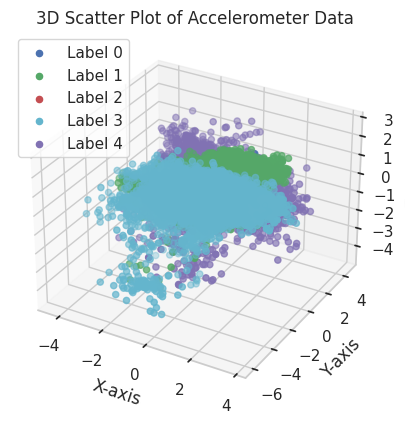

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting toolkit

# Assuming you have a DataFrame named 'scaled_X' with columns 'x', 'y', 'z', and 'label'
# Replace 'scaled_X' with the actual DataFrame containing accelerometer data

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define colors for each label (0-4)
label_colors = {
    0: 'b',  # Blue for label 0
    1: 'g',  # Green for label 1
    2: 'r',  # Red for label 2
    3: 'c',  # Cyan for label 3
    4: 'm',  # Magenta for label 4
}

# Extract the accelerometer data and labels from the DataFrame
x_data = scaled_X['new_x']
y_data = scaled_X['new_y']
z_data = scaled_X['new_z']
labels = scaled_X['label']

# Create a 3D scatter plot and assign colors based on labels
for label, color in label_colors.items():
    mask = (labels == label)
    ax.scatter(x_data[mask], y_data[mask], z_data[mask], c=color, marker='o', label=f'Label {label}')

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set a title for the plot
plt.title('3D Scatter Plot of Accelerometer Data')

# Show the plot with a legend
plt.legend()
plt.show()

In [ ]:
# Append all columns from 'balanced_data' to 'scaled_X'
combined_data = pd.concat([balanced_data, scaled_X], axis=1)
combined_data.head()

user gender   age  how_tall_in_meters  weight  body_mass_index    class  \
0  debora  Woman  46.0               162.0    75.0            286.0  sitting   
1  debora  Woman  46.0               162.0    75.0            286.0  sitting   
2  debora  Woman  46.0               162.0    75.0            286.0  sitting   
3  debora  Woman  46.0               162.0    75.0            286.0  sitting   
4  debora  Woman  46.0               162.0    75.0            286.0  sitting   

       x      y      z  label     new_x     new_y     new_z  label  
0 -42.75  27.75 -80.25    0.0 -0.270585 -0.977732  1.223761    0.0  
1 -46.75  28.00 -79.25    0.0 -0.758287 -0.957561  1.276780    0.0  
2 -44.25  29.25 -77.50    0.0 -0.453473 -0.856706  1.369564    0.0  
3 -45.75  29.50 -76.00    0.0 -0.636361 -0.836535  1.449093    0.0  
4 -45.00  29.00 -77.00    0.0 -0.544917 -0.876877  1.396074    0.0

## Data Visualization

In [ ]:
import plotly.express as px

# Assuming you have a DataFrame named 'combined_data' with columns 'new_x', 'new_y', 'new_z', and 'class'
# Replace 'combined_data' with the actual DataFrame containing accelerometer data

# Create an interactive 3D scatter plot with Plotly Express
fig = px.scatter_3d(combined_data, x='new_x', y='new_y', z='new_z', color='class')
fig.show()

In [ ]:
import plotly.express as px

# Assuming you have a DataFrame named 'combined_data' with columns 'new_x', 'new_y', 'new_z', and 'class'
# Replace 'combined_data' with the actual DataFrame containing accelerometer data

# Define the classes you want to include in the plot
classes_to_plot = ['standing', 'sitting', 'walking']

# Filter the DataFrame to include only the specified classes
filtered_data = df[df['class'].isin(classes_to_plot)]

# Create an interactive 3D scatter plot with Plotly Express
fig = px.scatter_3d(filtered_data, x='x', y='y', z='z', color='class')
fig.show()

In [ ]:
import plotly.express as px

# Assuming you have a DataFrame named 'combined_data' with columns 'new_x', 'new_y', 'new_z', and 'class'
# Replace 'combined_data' with the actual DataFrame containing accelerometer data

# Define the classes you want to include in the plot
classes_to_plot = ['sitting', 'sittingdown']

# Filter the DataFrame to include only the specified classes
filtered_data = df[df['class'].isin(classes_to_plot)]

# Create an interactive 3D scatter plot with Plotly Express
fig = px.scatter_3d(filtered_data, x='x', y='y', z='z', color='class')
fig.show()

In [ ]:
import plotly.express as px

# Assuming you have a DataFrame named 'combined_data' with columns 'new_x', 'new_y', 'new_z', and 'class'
# Replace 'combined_data' with the actual DataFrame containing accelerometer data

# Define the classes you want to include in the plot
classes_to_plot = ['standing', 'standingup']

# Filter the DataFrame to include only the specified classes
filtered_data = df[df['class'].isin(classes_to_plot)]

# Create an interactive 3D scatter plot with Plotly Express
fig = px.scatter_3d(filtered_data, x='x', y='y', z='z', color='class')
fig.show()

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with columns 'class', 'x', 'y', 'z', and 'label'

# Calculate the mean values of 'x', 'y', and 'z' for each class
mean_values = scaled_X.groupby('label')[['new_x', 'new_y', 'new_z']].mean()

# Print the mean values for each class
print(mean_values)

          new_x     new_y     new_z
label                              
0      0.155580 -0.811790  1.516163
1     -0.384356 -0.174439 -0.124959
2      0.393947  0.582829 -0.506216
3     -0.247235 -0.528925 -0.287987
4      0.082063  0.932325 -0.597000


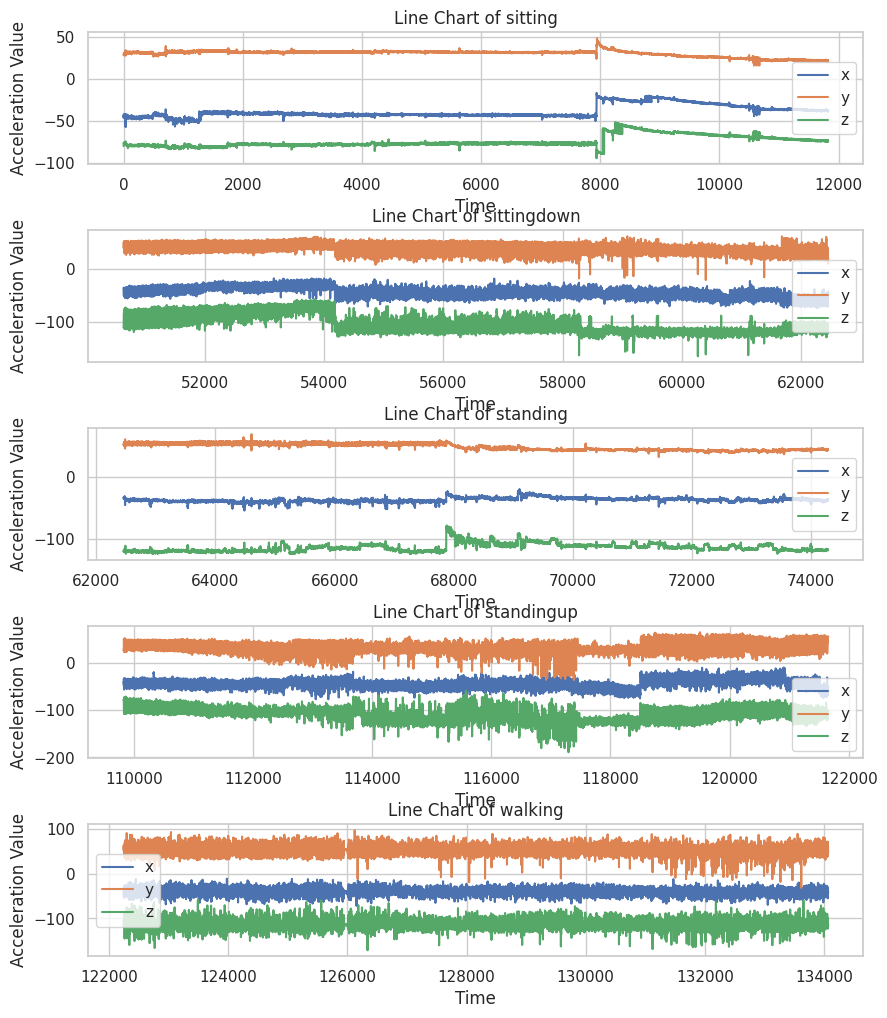

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the classes you want to plot
classes_to_plot = ['sitting', 'sittingdown', 'standing', 'standingup', 'walking']

# Create subplots for each class
fig, axes = plt.subplots(len(classes_to_plot), 1, figsize=(10, 12))
plt.subplots_adjust(hspace=0.5)

# List of columns to visualize
columns = ['x', 'y', 'z']

# Iterate through each class
for i, class_label in enumerate(classes_to_plot):
    ax = axes[i]
    class_data = balanced_data[balanced_data['class'] == class_label]

    # Create a line plot for each column (x, y, z)
    for column in columns:
        sns.lineplot(data=class_data, x=class_data.index, y=column, ax=ax, label=column)

    ax.set_title(f'Line Chart of {class_label}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Acceleration Value')
    ax.legend()

plt.show()

- Change Point Detection

In [ ]:
pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.2 MB/s eta 0:00:00


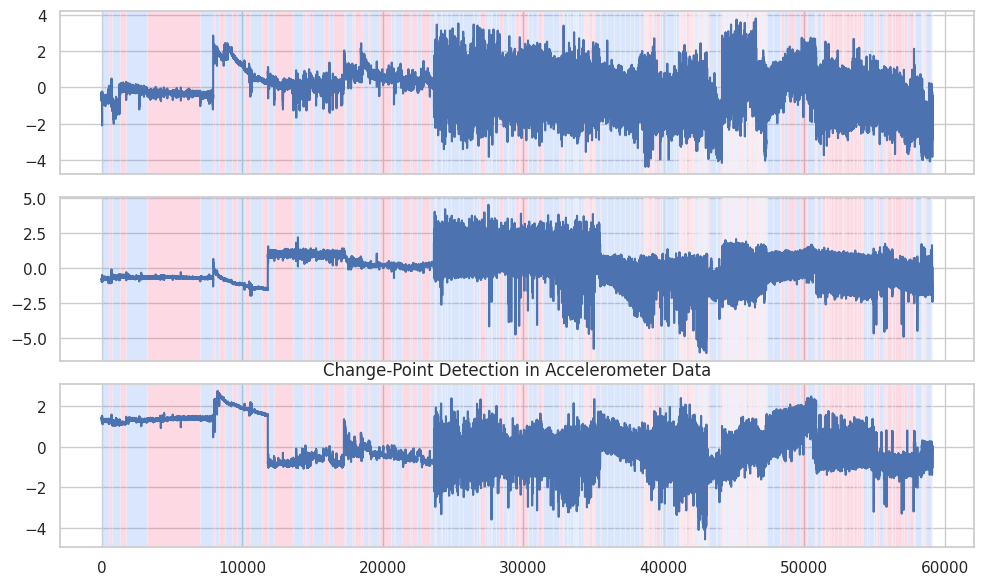

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pandas as pd

# Assuming scaled_X is your DataFrame
# Extract the relevant columns for change-point detection
accelerometer_data = scaled_X[['new_x', 'new_y', 'new_z']].values

# Perform change-point detection using the Pelt method for each dimension
model = "l2"  # l2-norm cost for each dimension
algo = rpt.Pelt(model=model, min_size=1, jump=1).fit(accelerometer_data)
result = algo.predict(pen=10)  # Adjust the penalty parameter

# Display the results
rpt.display(accelerometer_data, result, figsize=(10, 6))
plt.title('Change-Point Detection in Accelerometer Data')
plt.show()


## Model Development

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming your DataFrame is named 'scaled_X'
# Split the dataset into features (X) and target variable (y)
X = scaled_X.drop('label', axis=1)
y = scaled_X['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((47308, 3), (11827, 3))

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate models
models = {
    'Logistic Regression': y_pred_logistic,
    'Naive Bayes': y_pred_naive_bayes,
    'Decision Tree': y_pred_decision_tree,
    'SVM': y_pred_svm,
    'Random Forest': y_pred_random_forest
}

for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")

Model: Logistic Regression
Accuracy: 0.5476452185676841
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2382
           1       0.43      0.27      0.33      2427
           2       0.46      0.49      0.47      2314
           3       0.50      0.46      0.47      2320
           4       0.46      0.54      0.49      2384

    accuracy                           0.55     11827
   macro avg       0.53      0.55      0.53     11827
weighted avg       0.53      0.55      0.53     11827


Model: Naive Bayes
Accuracy: 0.6364251289422508
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2382
           1       0.49      0.36      0.41      2427
           2       0.59      0.92      0.72      2314
           3       0.55      0.42      0.47      2320
           4       0.64      0.50      0.56      2384

    accuracy                      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Convert class labels to integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

X_encoded = column_transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Neural Network (MLP)
mlp_model = MLPClassifier(max_iter=500, early_stopping=True, n_iter_no_change=10)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

In [ ]:
# Evaluate models
models = {
    'AdaBoost': adaboost_model,
    'Gradient Boosting': gradient_boosting_model,
    'Neural Network (MLP)': mlp_model
}

for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Display results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")

Model: AdaBoost
Accuracy: 0.5124714636002368
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2382
           1       0.61      0.12      0.20      2427
           2       0.55      0.24      0.33      2314
           3       0.65      0.32      0.43      2320
           4       0.33      0.89      0.48      2384

    accuracy                           0.51     11827
   macro avg       0.60      0.51      0.47     11827
weighted avg       0.60      0.51      0.47     11827


Model: Gradient Boosting
Accuracy: 0.7854062737803331
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2382
           1       0.73      0.65      0.69      2427
           2       0.77      0.90      0.83      2314
           3       0.69      0.67      0.68      2320
           4       0.74      0.72      0.73      2384

    accuracy                           

## Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import accuracy_score, classification_report

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Expand the Search Space
param_dist = {
    'n_estimators': sp_randint(50, 200),
    'max_depth': [None] + list(sp_randint(10, 50).rvs(10)),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'max_features': ['sqrt', 'log2', None]  # Add more options
}

# Use RandomizedSearchCV instead
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Adjust the number of iterations
    cv=3,
    scoring='accuracy',
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Hyperparameters:")
print(random_search.best_params_)

# Use the best model for predictions
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Best Hyperparameters:
{'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 120}
Random Forest Accuracy: 0.8097573349116428
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2382
           1       0.75      0.70      0.72      2427
           2       0.82      0.90      0.86      2314
           3       0.73      0.70      0.71      2320
           4       0.75      0.75      0.75      2384

    accuracy                           0.81     11827
   macro avg       0.81      0.81      0.81     11827
weighted avg       0.81      0.81      0.81     11827



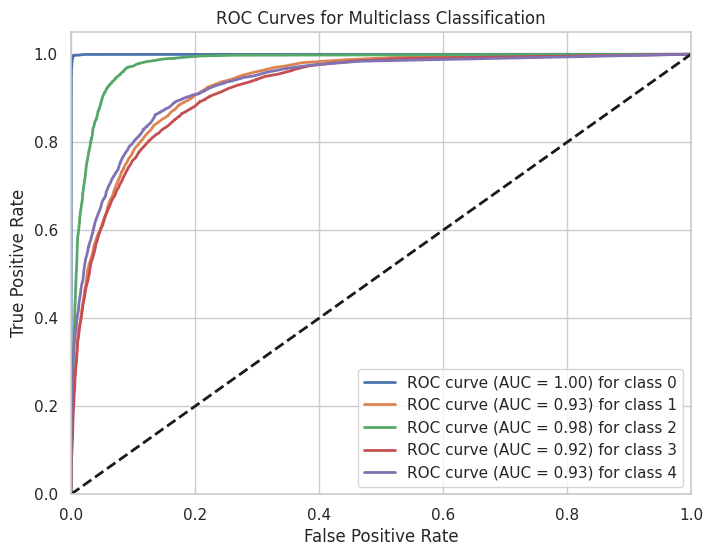

In [ ]:
from sklearn.metrics import roc_curve, auc

# Create and fit the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict probabilities for each class
y_prob = rf_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_encoder.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

## Performance Metrics

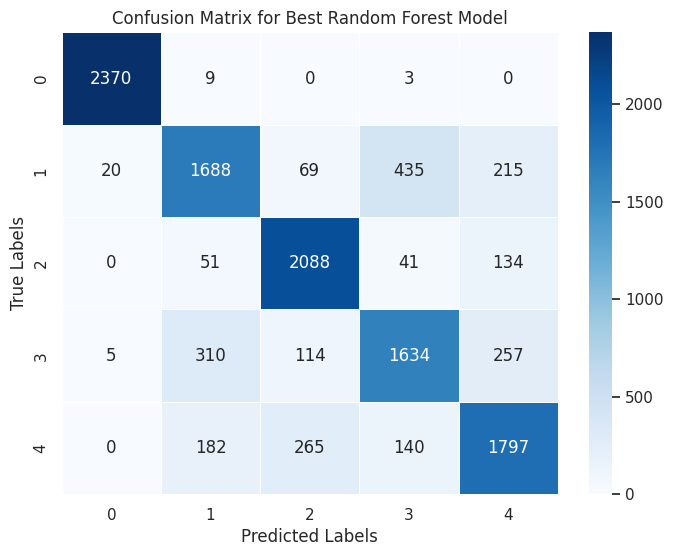

Best Random Forest Model Accuracy: 0.8098
Recall: 0.8098
Precision: 0.8080
F1 Score: 0.8083


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the best model obtained from hyperparameter tuning
y_pred_best = best_rf_model.predict(X_test)

# Calculate confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Calculate TPR, FPR, accuracy, recall, and F1 score
accuracy_best = accuracy_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best, average='weighted')
precision_best = precision_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix for Best Random Forest Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display accuracy, recall, precision, and F1 score for the best model
print(f"Best Random Forest Model Accuracy: {accuracy_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"F1 Score: {f1_best:.4f}")

## Model Comparison


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Generate predictions for each model on the test set
models = {
    'Logistic Regression': y_pred_logistic,
    'Naive Bayes': y_pred_naive_bayes,
    'Decision Tree': y_pred_decision_tree,
    'SVM': y_pred_svm,
    'Random Forest': y_pred_random_forest,
    'AdaBoost': y_pred_adaboost,
    'Gradient Boosting': y_pred_gradient_boosting,
    'Neural Network (MLP)': y_pred_mlp,
}

# Compare models based on accuracy
for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}\n")

# Compare models based on accuracy and print results
best_model_name = None
best_accuracy = 0.0

for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Update best model if the current model has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

# Select and print the best model
print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")


Model: Logistic Regression
Accuracy: 0.5476

Model: Naive Bayes
Accuracy: 0.6364

Model: Decision Tree
Accuracy: 0.7317

Model: SVM
Accuracy: 0.7599

Model: Random Forest
Accuracy: 0.7897

Model: AdaBoost
Accuracy: 0.5125

Model: Gradient Boosting
Accuracy: 0.7854

Model: Neural Network (MLP)
Accuracy: 0.7881

Best Model: Random Forest with Accuracy: 0.7897
